In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import yahoo_fin.stock_info as si
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/Users/yashsolanki/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [29]:
tickers = ["META", "AAPL"]

DAYS = 120

portfolio_close_prices = []
for i in range(len(tickers)):
    df = si.get_data(tickers[i])
    df = df.dropna()
    close_prices = df['close'].to_list()
    close_prices = close_prices[len(close_prices) - DAYS:]
    portfolio_close_prices.append(close_prices)
portfolio_close_prices = np.array(portfolio_close_prices)


In [30]:
portfolio_close_prices_df = pd.DataFrame(portfolio_close_prices.T)
portfolio_pct_change = portfolio_close_prices_df.pct_change()
portfolio_pct_change.iloc[0] = 0

In [31]:
portfolio_pct_change.head()


,0,1
0,0.000000,0.000000
1,-0.011457,-0.004701
2,0.040989,0.014803
3,0.030143,0.013684
4,-0.030842,-0.020078


In [32]:
days = np.array([i+1 for i in range(DAYS)])

## First Approach (Cumulative Sum of percent returns)

In [33]:
portfolio_pct_change_cumulative = np.cumsum(portfolio_pct_change) * 100
slopes = []
r_squares = []
for i in range(len(tickers)):
    reg = LinearRegression().fit(days.reshape(DAYS, 1), np.array(
        portfolio_pct_change_cumulative[i]).reshape(DAYS, 1))
    y_pred = reg.predict(days.reshape(-1, 1))
    r_squares.append(r2_score(portfolio_pct_change_cumulative[i], y_pred))
    slopes.append(reg.coef_[0])


In [34]:
momentums = [slopes[i] * r_squares[i] for i in range(len(slopes))]

In [35]:
slopes, r_squares

([array([0.59868708]), array([0.25453421])],
 [0.9538124516898911, 0.9579966399902717])

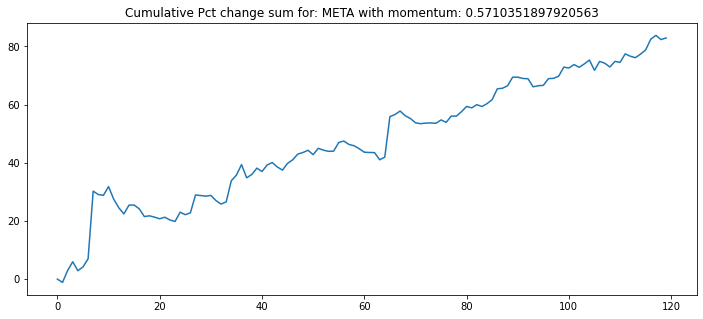

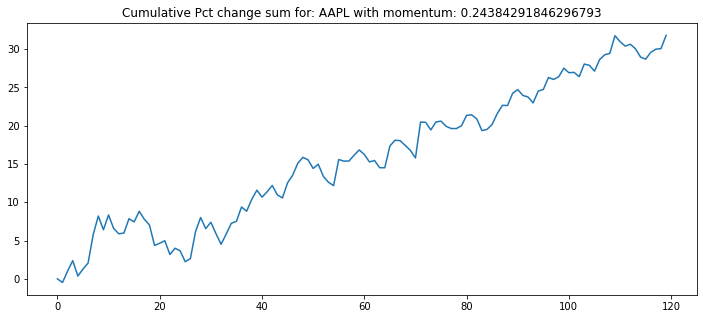

In [36]:
for i in range(len(tickers)):
    fig = plt.figure(figsize=(12, 5))
    plt.title(f"Cumulative Pct change sum for: {tickers[i]} with momentum: {float(momentums[i])}")    
    plt.plot(portfolio_pct_change_cumulative[i])
    plt.show()

